In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sb

In [100]:
data=pd.read_excel('TRAIN.xlsx',index_col=False)
data.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [126]:
print(data.describe())
print("Info:",data.info())

              Price        Month          Day        stops
count   9000.000000  9000.000000  9000.000000  9000.000000
mean    9087.764333     5.513222    12.678111     0.821444
std     4605.498942     2.973947     8.791965     0.673343
min     1759.000000     1.000000     3.000000     0.000000
25%     5228.000000     3.000000     5.000000     0.000000
50%     8369.000000     5.000000     6.000000     1.000000
75%    12373.000000     6.000000    21.000000     1.000000
max    79512.000000    12.000000    27.000000     3.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
Airline              9000 non-null object
Date                 9000 non-null datetime64[ns]
Departure Station    9000 non-null object
Arrival Station      9000 non-null object
Route Map            9000 non-null object
Departure Time       9000 non-null object
Arrival Time         9000 non-null object
Journey Time         9000 non-null object
Stops             

In [118]:
data["Date"]=pd.to_datetime(data['Date'])
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day

In [119]:
data.groupby('Departure Station')['Airline'].nunique()

Departure Station
Banglore     9
Chennai      5
Delhi       10
Kolkata      7
Mumbai       6
Name: Airline, dtype: int64

In [114]:
lst=[]
for i in data['Stops']:
    l=i.split(' ')[0]
    lst.append(l)
lst1=[0 if(i=='non-stop') else int(i) for i in lst]

In [115]:
data['stops']=lst1
data.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Month,Day,stops
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,1


In [147]:
lst=[]
for i in data['Journey Time']:
    l=i.split(' ')
    h=l[0].split('h')[0]
    hr=int(h[0])
    if(len(l)==2):
        m=l[1].split('m')
        mi=int(m[0])
    else:
        mi=0
    t=(hr*60)+mi
    lst.append(t)

In [148]:
data['Journey_Time']=lst

In [149]:
data.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price,Month,Day,stops,Journey_Time
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,0,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2,60
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,1,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,1,285


# Boxplot Airline/Price

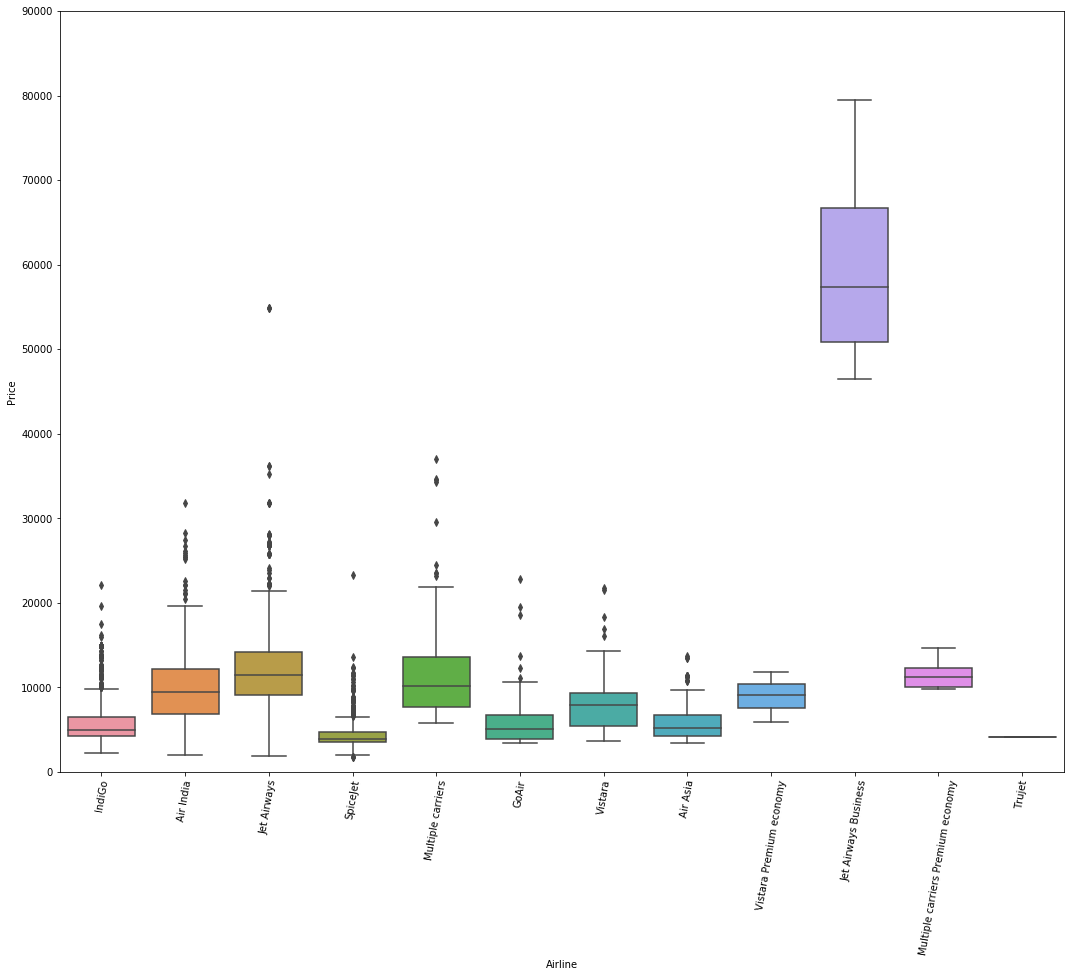

In [106]:
var = 'Airline'
d = pd.concat([data['Price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 14))
fig = sb.boxplot(x=var, y="Price", data=data)
plt.xticks(fontsize=10, rotation=80)
fig.axis(ymin=0, ymax=90000);

# Frequency distribution of various Airlines

Jet Airways                          3227
IndiGo                               1757
Air India                            1471
Multiple carriers                    1014
SpiceJet                              697
Vistara                               399
Air Asia                              256
GoAir                                 160
Multiple carriers Premium economy      11
Jet Airways Business                    4
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


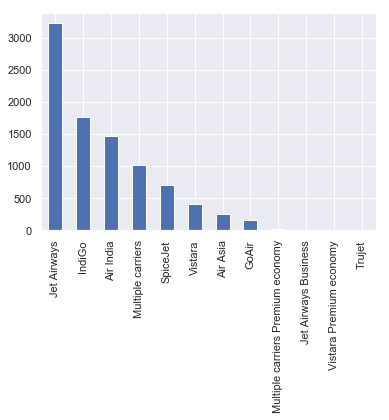

In [146]:
carrier_count = data["Airline"].value_counts()
print(carrier_count)
data['Airline'].value_counts().plot('bar')

# Variation of prices with different airlines

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]), <a list of 9 Text yticklabel objects>)

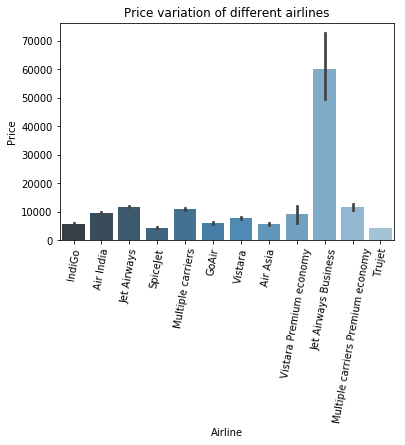

In [108]:
sb.barplot(x="Airline", y="Price", data=data, palette="Blues_d")
plt.title('Price variation of different airlines')
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=10)

# Variation of prices with different stops

Text(0.5, 1.0, 'stops')

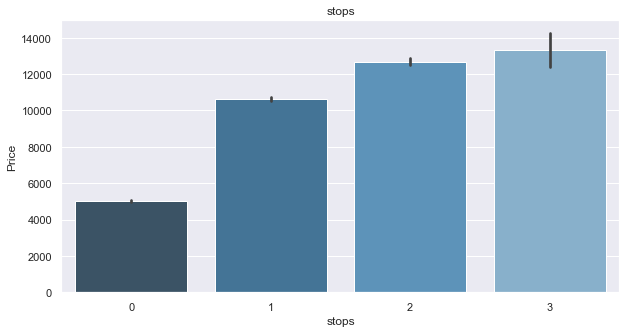

In [116]:
sb.set(style="darkgrid")
figure(figsize=(10,5)) 
sb.barplot(x="stops", y="Price", data=data, palette="Blues_d")
plt.title('stops')

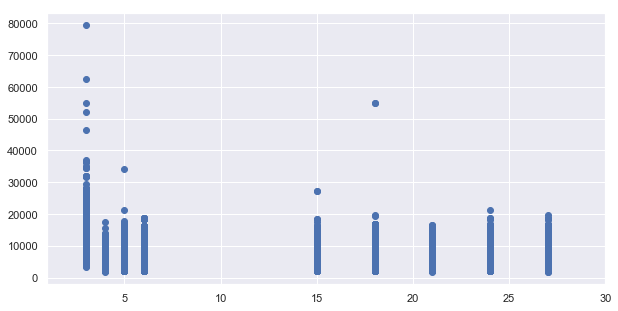

In [164]:
#scatter plot Day_Of_Journey/Price
plt.figure(figsize=(10,5))
plt.xlim(1,30)
plt.scatter(data['Day'], data['Price'])

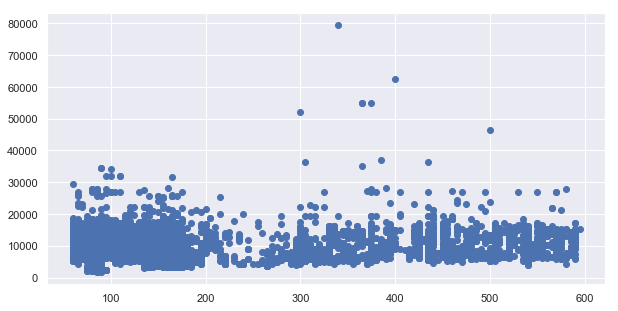

In [167]:
#scatter plot Journey Time in minutes/Price
plt.figure(figsize=(10,5))
plt.scatter(data['Journey_Time'], y=data['Price'])

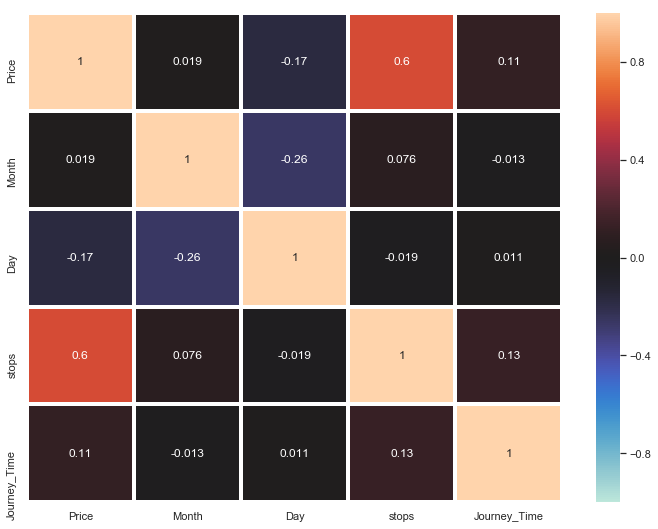

In [178]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax= 1, vmin= -1,annot=True, center=0, linewidth=3)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
data['Extra Info']=le.fit_transform(data['Extra Info'])

In [11]:
data.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,7,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,7,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,7,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,7,13302


In [12]:
data['Airline']=le.fit_transform(data['Airline'])
data['Departure Station']=le.fit_transform(data['Departure Station'])
data['Arrival Station']=le.fit_transform(data['Arrival Station'])

In [17]:
data=data.drop(['Stops','Date','Route Map'],1)

In [18]:
data.head()

,Airline,Departure Station,Arrival Station,Departure Time,Arrival Time,Journey Time,Extra Info,Price,stops,Month,Day
0,3,0,5,22:20,01:10 22 Mar,2h 50m,7,3897,0,3,24
1,1,3,0,05:50,13:15,7h 25m,7,7662,2,1,5
2,4,2,1,09:25,04:25 10 Jun,19h,7,13882,2,9,6
3,3,3,0,18:05,23:30,5h 25m,7,6218,1,12,5
4,3,0,5,16:50,21:35,4h 45m,7,13302,1,1,3


In [19]:
out=data['Price']

In [22]:
data=data.drop('Journey Time',1)

In [23]:
lst=[]
for i in data['Arrival Time']:
    l=i.split(' ')[0]
    lst.append(l)

In [24]:
data["Arrival_Time"]=lst

In [25]:
data=data.drop('Arrival Time',1)

In [26]:
data.head()

,Airline,Departure Station,Arrival Station,Departure Time,Extra Info,Price,stops,Month,Day,Journey_Time,Arrival_Time
0,3,0,5,22:20,7,3897,0,3,24,170,01:10
1,1,3,0,05:50,7,7662,2,1,5,445,13:15
2,4,2,1,09:25,7,13882,2,9,6,60,04:25
3,3,3,0,18:05,7,6218,1,12,5,325,23:30
4,3,0,5,16:50,7,13302,1,1,3,285,21:35


In [27]:
data['Arrival_Time']=le.fit_transform(data['Arrival_Time'])

In [28]:
data['Departure Time']=le.fit_transform(data['Departure Time'])

In [29]:
data['Journey_Time']=le.fit_transform(data['Journey_Time'])

In [30]:
data.head()

,Airline,Departure Station,Arrival Station,Departure Time,Extra Info,Price,stops,Month,Day,Journey_Time,Arrival_Time
0,3,0,5,209,7,3897,0,3,24,22,12
1,1,3,0,30,7,7662,2,1,5,77,103
2,4,2,1,69,7,13882,2,9,6,0,30
3,3,3,0,163,7,6218,1,12,5,53,215
4,3,0,5,148,7,13302,1,1,3,45,192


In [31]:
inp=data.drop('Price',1)



# Splitting our data to Test data and Train data


In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=48)

# Applying DescisionTree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtree_mod=DecisionTreeRegressor()
dtree_mod.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [34]:
ypred=dtree_mod.predict(xtest)
ypred

array([ 8567., 14151.,  6144., ...,  7832.,  4937.,  4174.])

In [35]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(ytest,ypred)
mse

4079878.382962963

# r2_score

In [36]:
r2_score(ytest,ypred)

0.8162845426190024

In [37]:
rmse=np.sqrt(mse)

In [38]:
rmse

2019.8708827454698

# Applying Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
rand_mod=RandomForestRegressor()

In [40]:
rand_mod.fit(xtrain,ytrain)

C:\Users\Bezza Pavan Kumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
rf_ypred=rand_mod.predict(xtest)
rf_ypred

array([ 7145.2, 14151. ,  5203.8, ...,  7832. ,  4391.5,  4174. ])

# r2_score

In [42]:
rf_mse=mean_squared_error(rf_ypred,ytest)
r2_score(ytest,rf_ypred)

0.8565045517315261

In [43]:
rf_rmse=np.sqrt(rf_mse)

In [44]:
rf_rmse

1785.1298914515799

# Applying Adaboost Regressor 

In [45]:
from sklearn.ensemble import AdaBoostRegressor
ada_mod=AdaBoostRegressor()
ada_mod.fit(xtrain,ytrain)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [46]:
ada_ypred=ada_mod.predict(xtest)

In [47]:
ada_mse=mean_squared_error(ada_ypred,ytest)
ada_mse

12342544.250762807

# r2_score

In [48]:
ada_rmse=np.sqrt(ada_mse)
print(ada_rmse)
print(r2_score(ytest,ada_ypred))

3513.1957319174244
0.444219667982521


# Applying Catboost Regressor

In [49]:
from catboost import CatBoostRegressor
cat_mod=CatBoostRegressor()
cat_mod.fit(xtrain,ytrain)

0:	learn: 4475.5728729	total: 134ms	remaining: 2m 13s
1:	learn: 4397.0976062	total: 176ms	remaining: 1m 28s
2:	learn: 4321.9015066	total: 217ms	remaining: 1m 12s
3:	learn: 4254.1279916	total: 257ms	remaining: 1m 3s
4:	learn: 4178.9432105	total: 300ms	remaining: 59.6s
5:	learn: 4119.9145622	total: 333ms	remaining: 55.1s
6:	learn: 4053.2862839	total: 399ms	remaining: 56.6s
7:	learn: 3977.4587163	total: 458ms	remaining: 56.8s
8:	learn: 3912.9514320	total: 517ms	remaining: 57s
9:	learn: 3857.0081851	total: 559ms	remaining: 55.3s
10:	learn: 3806.7659087	total: 617ms	remaining: 55.4s
11:	learn: 3747.9509473	total: 712ms	remaining: 58.6s
12:	learn: 3685.9533057	total: 795ms	remaining: 1m
13:	learn: 3639.9588937	total: 872ms	remaining: 1m 1s
14:	learn: 3599.3213488	total: 916ms	remaining: 1m
15:	learn: 3546.7033957	total: 956ms	remaining: 58.8s
16:	learn: 3502.1549966	total: 1000ms	remaining: 57.8s
17:	learn: 3458.9026346	total: 1.06s	remaining: 58s
18:	learn: 3423.7947129	total: 1.1s	remainin

152:	learn: 2023.0398022	total: 8.83s	remaining: 48.9s
153:	learn: 2021.7725606	total: 8.88s	remaining: 48.8s
154:	learn: 2020.4024959	total: 8.91s	remaining: 48.6s
155:	learn: 2018.4819221	total: 8.95s	remaining: 48.4s
156:	learn: 2016.3129082	total: 8.99s	remaining: 48.3s
157:	learn: 2013.7370156	total: 9.04s	remaining: 48.2s
158:	learn: 2011.7627730	total: 9.08s	remaining: 48s
159:	learn: 2010.4858141	total: 9.12s	remaining: 47.9s
160:	learn: 2007.7158046	total: 9.15s	remaining: 47.7s
161:	learn: 2004.5902458	total: 9.19s	remaining: 47.5s
162:	learn: 2002.4889802	total: 9.23s	remaining: 47.4s
163:	learn: 2001.1092279	total: 9.28s	remaining: 47.3s
164:	learn: 1999.0903476	total: 9.32s	remaining: 47.2s
165:	learn: 1997.9874664	total: 9.36s	remaining: 47s
166:	learn: 1996.1078727	total: 9.4s	remaining: 46.9s
167:	learn: 1993.9757218	total: 9.45s	remaining: 46.8s
168:	learn: 1992.1781249	total: 9.48s	remaining: 46.6s
169:	learn: 1988.9832523	total: 9.52s	remaining: 46.5s
170:	learn: 198

305:	learn: 1833.5693786	total: 15.8s	remaining: 35.9s
306:	learn: 1832.7845310	total: 15.9s	remaining: 35.9s
307:	learn: 1831.7288878	total: 15.9s	remaining: 35.8s
308:	learn: 1831.5178929	total: 16s	remaining: 35.7s
309:	learn: 1831.1866188	total: 16s	remaining: 35.6s
310:	learn: 1830.8333008	total: 16.1s	remaining: 35.6s
311:	learn: 1830.2529201	total: 16.1s	remaining: 35.6s
312:	learn: 1829.7387742	total: 16.2s	remaining: 35.6s
313:	learn: 1829.5342664	total: 16.3s	remaining: 35.5s
314:	learn: 1829.3934214	total: 16.3s	remaining: 35.5s
315:	learn: 1828.0097522	total: 16.4s	remaining: 35.4s
316:	learn: 1827.3404272	total: 16.4s	remaining: 35.4s
317:	learn: 1826.2571560	total: 16.5s	remaining: 35.3s
318:	learn: 1824.7668463	total: 16.5s	remaining: 35.2s
319:	learn: 1822.8326956	total: 16.5s	remaining: 35.2s
320:	learn: 1822.4863549	total: 16.6s	remaining: 35.1s
321:	learn: 1822.0793103	total: 16.6s	remaining: 35s
322:	learn: 1821.5121274	total: 16.7s	remaining: 34.9s
323:	learn: 1820

459:	learn: 1750.5147037	total: 22.9s	remaining: 26.9s
460:	learn: 1750.1481704	total: 22.9s	remaining: 26.8s
461:	learn: 1749.9756159	total: 23s	remaining: 26.8s
462:	learn: 1749.1504823	total: 23s	remaining: 26.7s
463:	learn: 1748.9579281	total: 23.1s	remaining: 26.6s
464:	learn: 1748.8247710	total: 23.1s	remaining: 26.6s
465:	learn: 1748.5316340	total: 23.1s	remaining: 26.5s
466:	learn: 1747.8831316	total: 23.2s	remaining: 26.5s
467:	learn: 1747.0475447	total: 23.2s	remaining: 26.4s
468:	learn: 1746.8129643	total: 23.3s	remaining: 26.3s
469:	learn: 1746.5603266	total: 23.3s	remaining: 26.3s
470:	learn: 1745.6285807	total: 23.3s	remaining: 26.2s
471:	learn: 1745.0126140	total: 23.4s	remaining: 26.2s
472:	learn: 1744.3602784	total: 23.4s	remaining: 26.1s
473:	learn: 1742.8340292	total: 23.5s	remaining: 26.1s
474:	learn: 1742.7076100	total: 23.6s	remaining: 26.1s
475:	learn: 1742.2120047	total: 23.6s	remaining: 26s
476:	learn: 1741.3405463	total: 23.7s	remaining: 26s
477:	learn: 1741.1

610:	learn: 1684.8605766	total: 29.9s	remaining: 19.1s
611:	learn: 1684.6537171	total: 30s	remaining: 19s
612:	learn: 1683.9659926	total: 30s	remaining: 19s
613:	learn: 1683.6500756	total: 30.1s	remaining: 18.9s
614:	learn: 1683.3742633	total: 30.1s	remaining: 18.9s
615:	learn: 1683.2726076	total: 30.2s	remaining: 18.8s
616:	learn: 1683.1696026	total: 30.2s	remaining: 18.8s
617:	learn: 1682.8974284	total: 30.3s	remaining: 18.7s
618:	learn: 1681.9613466	total: 30.3s	remaining: 18.7s
619:	learn: 1681.6507982	total: 30.4s	remaining: 18.6s
620:	learn: 1681.1379670	total: 30.4s	remaining: 18.6s
621:	learn: 1680.9434672	total: 30.5s	remaining: 18.5s
622:	learn: 1680.5535597	total: 30.5s	remaining: 18.5s
623:	learn: 1680.2860717	total: 30.6s	remaining: 18.4s
624:	learn: 1679.9494990	total: 30.6s	remaining: 18.4s
625:	learn: 1679.3640265	total: 30.6s	remaining: 18.3s
626:	learn: 1678.7783042	total: 30.7s	remaining: 18.3s
627:	learn: 1678.6676581	total: 30.7s	remaining: 18.2s
628:	learn: 1677.7

763:	learn: 1638.4117394	total: 37.2s	remaining: 11.5s
764:	learn: 1638.3845565	total: 37.3s	remaining: 11.4s
765:	learn: 1638.1944897	total: 37.3s	remaining: 11.4s
766:	learn: 1637.9815655	total: 37.4s	remaining: 11.3s
767:	learn: 1637.8796863	total: 37.4s	remaining: 11.3s
768:	learn: 1637.4774684	total: 37.5s	remaining: 11.3s
769:	learn: 1636.9659782	total: 37.5s	remaining: 11.2s
770:	learn: 1636.8987771	total: 37.5s	remaining: 11.1s
771:	learn: 1636.8146815	total: 37.6s	remaining: 11.1s
772:	learn: 1636.6103484	total: 37.6s	remaining: 11.1s
773:	learn: 1635.8312832	total: 37.7s	remaining: 11s
774:	learn: 1635.6293810	total: 37.7s	remaining: 10.9s
775:	learn: 1634.8567692	total: 37.8s	remaining: 10.9s
776:	learn: 1634.7523046	total: 37.8s	remaining: 10.8s
777:	learn: 1634.6589279	total: 37.9s	remaining: 10.8s
778:	learn: 1634.1243416	total: 37.9s	remaining: 10.8s
779:	learn: 1633.9296692	total: 37.9s	remaining: 10.7s
780:	learn: 1633.7007710	total: 38s	remaining: 10.7s
781:	learn: 16

914:	learn: 1595.9512685	total: 44.8s	remaining: 4.16s
915:	learn: 1595.6739231	total: 44.9s	remaining: 4.11s
916:	learn: 1595.3584253	total: 44.9s	remaining: 4.07s
917:	learn: 1595.2432256	total: 45s	remaining: 4.02s
918:	learn: 1594.9634688	total: 45s	remaining: 3.97s
919:	learn: 1594.7910451	total: 45.1s	remaining: 3.92s
920:	learn: 1594.5912940	total: 45.1s	remaining: 3.87s
921:	learn: 1594.4422678	total: 45.2s	remaining: 3.82s
922:	learn: 1594.2232828	total: 45.2s	remaining: 3.77s
923:	learn: 1593.9164127	total: 45.3s	remaining: 3.73s
924:	learn: 1593.6431903	total: 45.3s	remaining: 3.67s
925:	learn: 1593.4706551	total: 45.4s	remaining: 3.63s
926:	learn: 1593.0639595	total: 45.4s	remaining: 3.58s
927:	learn: 1592.6983416	total: 45.5s	remaining: 3.53s
928:	learn: 1592.1164780	total: 45.5s	remaining: 3.48s
929:	learn: 1592.0389606	total: 45.6s	remaining: 3.43s
930:	learn: 1591.8538916	total: 45.6s	remaining: 3.38s
931:	learn: 1591.3052489	total: 45.7s	remaining: 3.33s
932:	learn: 15

In [50]:
cat_ypred=cat_mod.predict(xtest)

In [51]:
cat_mse=mean_squared_error(cat_ypred,ytest)

In [52]:
cat_rmse=np.sqrt(cat_mse)
cat_rmse

2114.8580887833546

# Taking Random forest model as final model. Hence RMSE value for random forset  is low  when compared to the RMSE values of other models.

In [53]:
final_model=rand_mod.fit(xtrain,ytrain)

In [54]:
yypred=final_model.predict(xtest)

In [55]:
yypred

array([ 6543.9, 13882.6,  5231.3, ...,  7788.9,  4138. ,  4174. ])

# Fitting Test_Data

In [56]:
test_data=pd.read_excel('TEST-11.xlsx')

In [57]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 10 columns):
Airline              1683 non-null object
Date                 1683 non-null object
Departure Station    1683 non-null object
Arrival Station      1683 non-null object
Route Map            1682 non-null object
Departure Time       1683 non-null object
Arrival Time         1683 non-null object
Journey Time         1683 non-null object
Stops                1682 non-null object
Extra Info           1683 non-null object
dtypes: object(10)
memory usage: 131.6+ KB


In [59]:
test_data['Departure Station']=le.fit_transform(test_data['Departure Station'])

In [60]:
test_data['Airline']=le.fit_transform(test_data['Airline'])

In [61]:
test_data['Arrival Station']=le.fit_transform(test_data['Arrival Station'])

In [62]:
test_data['Departure Time']=le.fit_transform(test_data['Departure Time'])

In [63]:
test_data['Extra Info']=le.fit_transform(test_data['Extra Info'])

In [64]:
lst=[]
for i in test_data['Journey Time']:
    l=i.split(' ')
    h=l[0].split('h')[0]
    hr=int(h[0])
    if(len(l)==2):
        m=l[1].split('m')
        mi=int(m[0])
    else:
        mi=0
    t=(hr*60)+mi
    lst.append(t)

In [65]:
lst=[]
for i in test_data['Journey Time']:
    l=i.split(' ')
    h=l[0].split('h')[0]
    hr=int(h)
    if(len(l)==2):
        m=l[1].split('m')[0]
        mi=int(m)
    else:
        mi=0
    t=(hr*60)+mi
    lst.append(t)

In [66]:
test_data['Journey_Time']=lst

In [67]:
test_data.head()

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Journey_Time
0,4,9/05/2019,3,0,CCU → DEL → BLR,163,21:05 10 May,24h 40m,1 stop,7,1480
1,2,15/04/2019,0,2,BLR → DEL,168,23:40,2h 45m,non-stop,7,165
2,4,12/06/2019,2,1,DEL → JAI → BOM → COK,61,04:25 13 Jun,18h 45m,2 stops,4,1125
3,8,18/03/2019,0,5,BLR → DEL,24,08:35,2h 50m,non-stop,6,170
4,8,24/05/2019,0,2,BLR → DEL,26,08:35,2h 40m,non-stop,7,160


In [68]:
test_data["Date"]=pd.to_datetime(test_data['Date'])
test_data['Month']=test_data['Date'].dt.month

In [69]:
test_data['Day']=test_data['Date'].dt.day

In [70]:
lst=[]
for i in test_data['Arrival Time']:
    l=i.split(' ')[0]
    lst.append(l)

In [71]:
test_data['Arrival_Time']=lst

In [72]:
test_data['Arrival_Time']=le.fit_transform(test_data['Arrival_Time'])

In [73]:
test_data['Stops']=test_data['Stops'].fillna('1 stop')

In [74]:
test_data.Stops.replace('non-stop',0,inplace=True)
test_data.Stops.replace('1 stop',1,inplace=True)
test_data.Stops.replace('2 stops',2,inplace=True)
test_data.Stops.replace('3 stops',3,inplace=True)
test_data.Stops.replace('4 stops',4,inplace=True)

In [75]:
test_data=test_data.drop(['Date','Route Map','Arrival Time','Journey Time'],1)

In [76]:
final_ypred=final_model.predict(test_data)

In [77]:
final_price=pd.DataFrame()

In [78]:
lst=[]
for i in final_ypred:
    l=round(i)
    lst.append(l)

In [79]:
final_price['Price']=lst

In [80]:
final_price=final_price.set_index('Price')

In [81]:
final_price.to_csv('Flight_Prices_Output.csv')

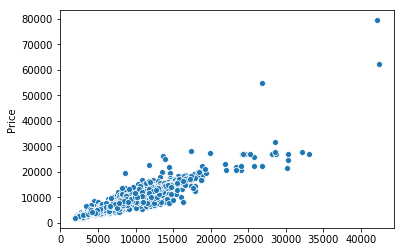

In [82]:
sb.scatterplot(yypred,ytest)